# Workshop: Deep Learning for Image Processing

The objective of this workshop is to introduce the basic concepts of deep learning for image processing. We will use the [Keras](https://keras.io/) library to build and train a convolutional neural network for image classification.

For people which use python 1.12 in local, you can use venv or conda to create a virtual environment with python 3.11 to run this workshop. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to run the notebook.

In this workshop, we will use first use the [MINST](https://keras.io/api/datasets/mnist/) dataset to train a model to recognize handwritten digits. Then, we will use the [CIFAR-10](https://keras.io/api/datasets/cifar10/) dataset to train a model to recognize objects in images.

In [15]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

#### Exercise 1: Load the MINST dataset

The MINST dataset contains 70,000 images of handwritten digits. Each image is a 28x28 grayscale image. The dataset is split into 60,000 training images and 10,000 test images.

For this exercise, we will load the dataset and plot the first 25 images of the training set.

(60000, 28, 28)


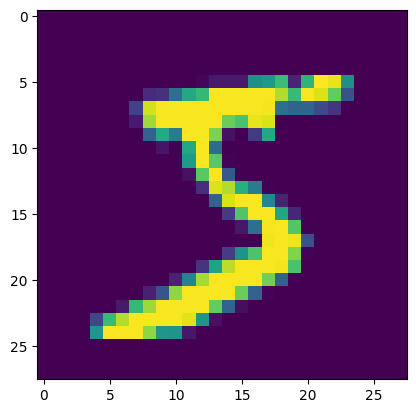

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

plt.imshow(X_train[0])
plt.show()


#### Exercise 2: One-hot encode the labels 

The labels of the MINST dataset are integers between 0 and 9. For this exercise, we will one-hot encode the labels. For example, the label 3 will be encoded as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

In [2]:
from keras.utils import to_categorical

# Preprocess class labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


#### Exercise 3: Build a convolutional neural network

For this exercise, we will build a convolutional neural network to classify the images of the MINST dataset. The network will be made of 5 different types of layers:
- *convolutional layers*: a convolutional layer convolves the input with a set of filters, each producing one feature map in the output. The convolutional layer is followed by an activation function.
- *pooling layers*: pooling layers downsample the input along the spatial dimensions (width, height) by taking the maximum, average, etc. of a subset of the input.
- *flatten layers*: flatten the input
- *Dropout layers*: randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.
- *dense layers*: fully connected layers

For each layer, an activation function is applied to the output of the layer. The activation function is a non-linear function that is applied to the output of a layer. It allows the network to learn complex patterns in the data. For this exercise, we will use the [ReLU](https://keras.io/api/layers/activations/#relu-function) activation function.

> For the last layer, we will use the [softmax](https://keras.io/api/layers/activations/#softmax-function) activation function. The softmax function is a generalization of the sigmoid function to multiple dimensions. It is often used as the activation function for the last layer of a classification network. It takes as input a vector of real numbers and normalizes it into a probability distribution consisting of non-negative real numbers that sum to 1.

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4), activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#### Exercise 4: Compile the model

For this exercise, we will compile the model. In order to do so, we need to specify the loss function and the optimizer. The [loss function](https://keras.io/api/losses/) is a function that measures the difference between the predicted value of the network and the true value. The [optimizer](https://keras.io/api/optimizers/) is an algorithm that will update the parameters of the network in order to minimize the loss function.

Also display the summary of the model.

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        32832     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 7744)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               991360    
                                                      

#### Exercise 5: Train the model

For this exercise, we will train the model. We will use the [fit](https://keras.io/api/models/model_training_apis/#fit-method) method of the model to train the model. The fit method trains the model for a fixed number of epochs (iterations on a dataset). For each epoch, it first shuffles the training data, then proceeds to the training of each batch. At the end of each epoch, the validation data is used to evaluate the model.

> For this exercise we will use only the first 1000 images for training set in order to speed up the training.

In [4]:
history = model.fit(X_train[:1000], y_train[:1000], batch_size=128, epochs=10, verbose=1)

(60000, 28, 28)
(60000, 10)
Epoch 1/10
8/8 [==============================] - 1s 40ms/step - loss: 15.3187 - accuracy: 0.1630
Epoch 2/10
8/8 [==============================] - 0s 39ms/step - loss: 2.1567 - accuracy: 0.2490
Epoch 3/10
8/8 [==============================] - 0s 45ms/step - loss: 1.8258 - accuracy: 0.3480
Epoch 4/10
8/8 [==============================] - 1s 83ms/step - loss: 1.4619 - accuracy: 0.4740
Epoch 5/10
8/8 [==============================] - 1s 93ms/step - loss: 1.1332 - accuracy: 0.5970
Epoch 6/10
8/8 [==============================] - 1s 95ms/step - loss: 0.9404 - accuracy: 0.6720
Epoch 7/10
8/8 [==============================] - 1s 94ms/step - loss: 0.7296 - accuracy: 0.7530
Epoch 8/10
8/8 [==============================] - 1s 92ms/step - loss: 0.5551 - accuracy: 0.8140
Epoch 9/10
8/8 [==============================] - 1s 96ms/step - loss: 0.4752 - accuracy: 0.8350
Epoch 10/10
8/8 [==============================] - 1s 102ms/step - loss: 0.3926 - accuracy: 0.8660

#### Exercise 6: Plot the training accuracy and validation loss

For this exercise, we will plot the training accuracy and validation loss. We will use the [history](https://keras.io/api/models/model_training_apis/#fit-method) attribute of the model to get the training history.

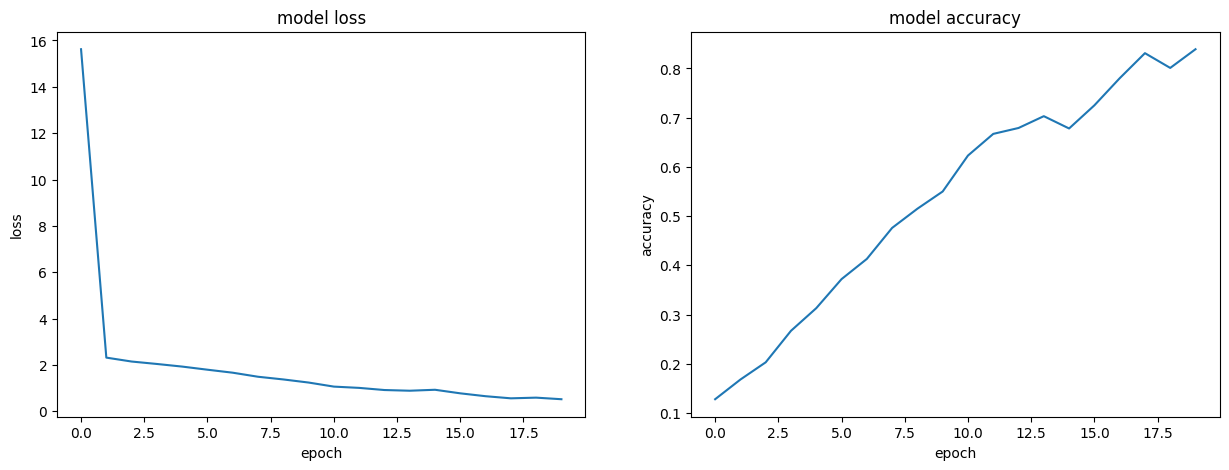

In [19]:
# PLotting the accuracy and loss curves
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(history.history['loss'])
axes[0].set_title('model loss')
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epoch')

axes[1].plot(history.history['accuracy'])
axes[1].set_title('model accuracy')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')

plt.show()

#### Exercise 7: Evaluate the model

For this exercise, we will evaluate the model on the test set. We will use the [evaluate](https://keras.io/api/models/model_training_apis/#evaluate-method) method of the model to evaluate the model on the test set.

In [7]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2789234519004822
Test accuracy: 0.9210000038146973


#### Exercise 8: Harder case: CIFAR-10

Previously, we used the MINST dataset to train a model to recognize handwritten digits. But this dataset is too simple to evaluate the performance of a model. For this exercise, we will use the CIFAR-10 dataset to train a model to recognize objects in images. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The dataset is split into 50,000 training images and 10,000 test images.

Your objective is to build a convolutional neural network to classify the images of the CIFAR-10 dataset. You can use everything you learned in the previous exercises, but you will need to adapt the model to work with color images and the image of the CIFAR-10 dataset. But you need to optimize your architecture to get the best accuracy.

(50000, 32, 32, 3)


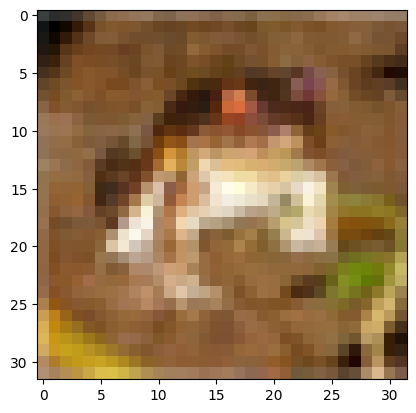

In [8]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)

plt.imshow(X_train[0])
plt.show()

In [9]:
from keras.utils import to_categorical

# Preprocess class labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4), activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               1384576   
                                                      

In [11]:
history = model.fit(X_train[:1000], y_train[:1000], batch_size=128, epochs=20, verbose=1)

Epoch 1/20
8/8 [==============================] - 1s 113ms/step - loss: 15.6228 - accuracy: 0.1280
Epoch 2/20
8/8 [==============================] - 1s 131ms/step - loss: 2.3148 - accuracy: 0.1680
Epoch 3/20
8/8 [==============================] - 1s 127ms/step - loss: 2.1459 - accuracy: 0.2030
Epoch 4/20
8/8 [==============================] - 1s 135ms/step - loss: 2.0408 - accuracy: 0.2670
Epoch 5/20
8/8 [==============================] - 1s 127ms/step - loss: 1.9279 - accuracy: 0.3130
Epoch 6/20
8/8 [==============================] - 1s 132ms/step - loss: 1.7932 - accuracy: 0.3720
Epoch 7/20
8/8 [==============================] - 1s 130ms/step - loss: 1.6639 - accuracy: 0.4130
Epoch 8/20
8/8 [==============================] - 1s 130ms/step - loss: 1.4893 - accuracy: 0.4760
Epoch 9/20
8/8 [==============================] - 1s 129ms/step - loss: 1.3731 - accuracy: 0.5150
Epoch 10/20
8/8 [==============================] - 1s 127ms/step - loss: 1.2394 - accuracy: 0.5500
Epoch 11/20
8/8 [=

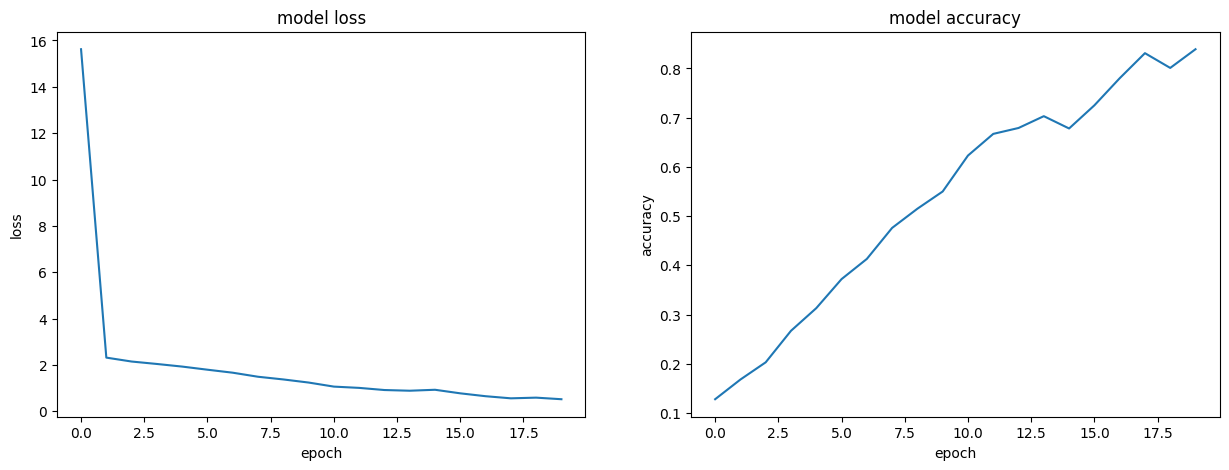

In [12]:
# PLotting the accuracy and loss curves
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(history.history['loss'])
axes[0].set_title('model loss')
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epoch')

axes[1].plot(history.history['accuracy'])
axes[1].set_title('model accuracy')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')

plt.show()

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.6848886013031006
Test accuracy: 0.34060001373291016


# Conclusion

In this workshop, you have implemented a simple convolutional neural network to classify images, and you have learned how to use the Keras library to build and train a convolutional neural network. But you can go further and try to implement a more complex convolutional neural network to solve more realistics problems.

# To go further

To go further, you can try to implement a more complex convolutional neural network to solve more realistics problems or difficult problems, such as Ciphar-100. You can also try to use alternative libraries, such as [PyTorch](https://pytorch.org/) or [TensorFlow](https://www.tensorflow.org/).